In [35]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv("loan_approval_dataset.csv") 

In [37]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [39]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [40]:
data.duplicated().sum()

np.int64(0)

In [41]:
data .columns = data.columns.str.strip()
data1 = data.drop(columns=['loan_id', 'no_of_dependents', 'education','loan_term'])

In [42]:
data1

,self_employed,income_annum,loan_amount,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,No,9600000,29900000,778,2400000,17600000,22700000,8000000,Approved
1,Yes,4100000,12200000,417,2700000,2200000,8800000,3300000,Rejected
2,No,9100000,29700000,506,7100000,4500000,33300000,12800000,Rejected
3,No,8200000,30700000,467,18200000,3300000,23300000,7900000,Rejected
4,Yes,9800000,24200000,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...
4264,Yes,1000000,2300000,317,2800000,500000,3300000,800000,Rejected
4265,Yes,3300000,11300000,559,4200000,2900000,11000000,1900000,Approved
4266,No,6500000,23900000,457,1200000,12400000,18100000,7300000,Rejected
4267,No,4100000,12800000,780,8200000,700000,14100000,5800000,Approved


In [43]:
print(data1.columns)

Index(['self_employed', 'income_annum', 'loan_amount', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [44]:
print(data1.dtypes)

categorical_cols = data1.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

self_employed               object
income_annum                 int64
loan_amount                  int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object
Categorical Columns: Index(['self_employed', 'loan_status'], dtype='object')


In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    data1[col] = label_encoder.fit_transform(data1[col])

In [46]:
data1

,self_employed,income_annum,loan_amount,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0,9600000,29900000,778,2400000,17600000,22700000,8000000,0
1,1,4100000,12200000,417,2700000,2200000,8800000,3300000,1
2,0,9100000,29700000,506,7100000,4500000,33300000,12800000,1
3,0,8200000,30700000,467,18200000,3300000,23300000,7900000,1
4,1,9800000,24200000,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...
4264,1,1000000,2300000,317,2800000,500000,3300000,800000,1
4265,1,3300000,11300000,559,4200000,2900000,11000000,1900000,0
4266,0,6500000,23900000,457,1200000,12400000,18100000,7300000,1
4267,0,4100000,12800000,780,8200000,700000,14100000,5800000,0


<function matplotlib.pyplot.show(close=None, block=None)>

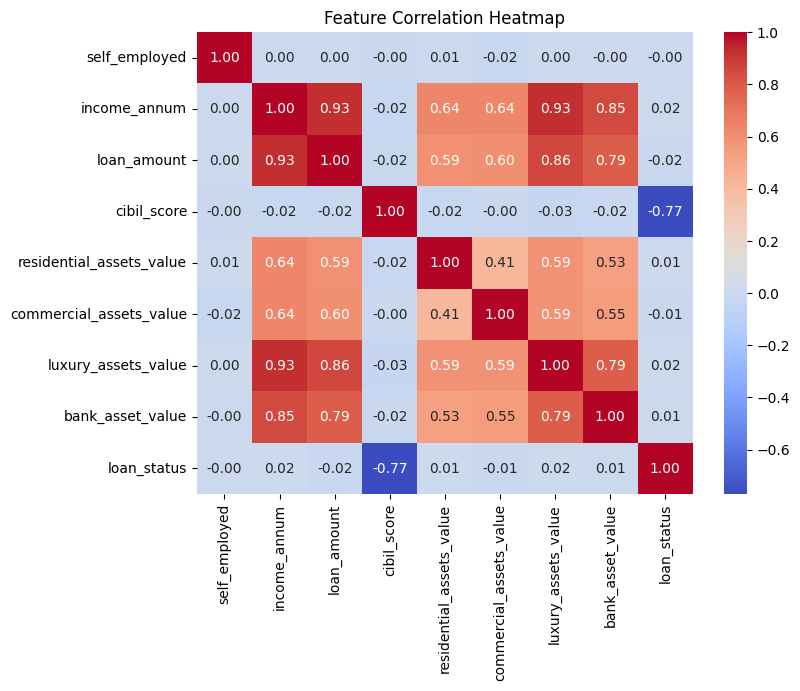

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(data1.corr(), annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show

In [62]:
x = data1.drop('loan_status',axis=1)
y = data1['loan_status']
y = y.apply(lambda x:1 if x=='Fully paid' else 0)

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state =42)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'n_estimators': [50, 100, 150, 200, 300, 500]}

# Initialize model
rf = RandomForestClassifier()

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print best n_estimators value
print("Best n_estimators:", grid_search.best_params_['n_estimators'])

Best n_estimators: 50


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 1.00


In [53]:
import pickle

# Assuming `model` is your trained ML model
with open("model.pkl", "wb") as f:
    pickle.dump(rf_model, f)
print("Model saved as 'model.pkl'")

Model saved as 'model.pkl'


In [61]:
%%writefile loanapp.py

import streamlit as st
import numpy as np
import pickle

model = pickle.load(open("model.pkl", "rb"))

# Title for the Web App
st.title("Loan Approval Prediction")

st.write("Enter the applicant's details:")

# Input fields for user data
cibil_score = st.number_input("CIBIL Score", min_value=300, max_value=900, value=650)
income = st.number_input("Enter Annual Income ($)", min_value=100000,max_value=10000000, step=1000)
loan_amount = st.number_input("Enter Loan Amount ($)", min_value=10000,max_value=1000000, step=1000)
dti = st.number_input("Debt-to-Income Ratio (%)", min_value=0.0, max_value=100.0, step=0.1)

# Optional: You can include more features as needed for your model

def risk_analysis(cibil_score, dti):
    if cibil_score > 600 and dti < 20:
        return "Low Risk"
    elif 600 <= cibil_score <= 700 and 20 <= dti <= 35:
        return "Medium Risk"
    else:
        return "High Risk"

# Prediction button
if st.button("Predict Loan Approval"):
    # Decision logic: Accept if CIBIL score > 700, else Reject.
    if cibil_score > 600:
        decision = "Loan Accepted"
    else:
        decision = "Loan Rejected"

    st.success(f"Loan Application Status: {decision}")

    risk = risk_analysis(cibil_score, dti)
    st.write(f"📊 Risk Level: *{risk}*")

Overwriting loanapp.py


In [63]:
print(y.value_counts())

loan_status
0    4269
Name: count, dtype: int64
